In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


# Load File

In [2]:
#解壓縮檔案
#%cp -r "/content/MyDrive/MyDrive/UT_NLP/dataset/drive_data.zip" /content/sample_data/drive_data.zip

In [3]:
#解壓縮檔案
#!unzip /content/sample_data/drive_data.zip -d /content/a4-distrib

In [4]:
#複製檔案
!cp -r /content/MyDrive/MyDrive/UT_NLP/final/ /content/

In [5]:
#解壓縮檔案
#!unzip /content/sample_data/dense_data.zip -d /content/a4-distrib

In [6]:
%cd /content/final/

/content/final


In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [8]:
!pip install checklist
!jupyter nbextension install --py --sys-prefix checklist.viewer
!jupyter nbextension enable --py --sys-prefix checklist.viewer
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached qtconsole-5.5.1-py3-none-any.whl (123 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 35.6 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using c

In [9]:
!pip install numpy requests nlpaug
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.4 MB/s eta 0:00:00


# Load Models & Datasets

In [10]:
from datasets import load_dataset

# Load the IMDb dataset
imdb = load_dataset("squad")

# Access the training and test sets
train_dataset = imdb["train"]
test_dataset = imdb["validation"]


print(train_dataset[0])

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}


# Train Dataset

In [11]:
import random
import pandas as pd
import numpy as np
import datasets
import json
# make noise
# introduce a typo in a word
def introduce_typo(word):
    if len(word) > 1:
        char_pos = random.randint(0, len(word) - 1)
        word = list(word)
        word[char_pos] = random.choice('abcdefghijklmnopqrstuvwxyz')
        return ''.join(word)
    return word

# introduce noise into a sentence
def add_noise(sentence):
    words = sentence.split()
    noisy_words = [introduce_typo(word) if random.random() < 0.1 else word for word in words]
    return ' '.join(noisy_words)

# Load the dataset
df = pd.read_csv('combined_train_1130.csv')
df.head()


FileNotFoundError: ignored

In [ ]:

# Apply noise to each sentence (replace 'text_column' with the actual column name)
df['context'] = df['context'].apply(add_noise)

# Save the modified dataset
df.to_csv('combined_train_1203_noise.csv', index=False)

In [ ]:
#https://github.com/marcotcr/checklist/tree/master/notebooks
#https://github.com/filipegl/checklist_SQuAD_exp/blob/main/3.%20SQuAD-get-checklist-data.ipynb

#dataset = datasets.load_dataset('csv', data_files='combined_train_1130.csv')
dataset = datasets.load_dataset('csv', data_files='combined_train_1203_noise.csv')
def format_dataset(example):
    """
    string to dictionary
    dictionary became string when saved to csv. need to convert it back to dict.
    """
    example['answers'] = json.loads(example['answers'])
    if type(example['answers']) == str:
        example['answers'] = json.loads(example['answers'])
    return example
dataset = dataset.map(format_dataset)
dataset.shape

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/294521 [00:00<?, ? examples/s]

{'train': (294521, 3)}

In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DefaultDataCollator
from transformers import AutoTokenizer

data_collator = DefaultDataCollator()
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
import random
random.seed(42)
dataset = dataset["train"].select(
    random.sample(range(len(dataset["train"])), 75000)
).train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['context', 'question', 'answers'],
        num_rows: 67500
    })
    test: Dataset({
        features: ['context', 'question', 'answers'],
        num_rows: 7500
    })
})

In [ ]:
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True, remove_columns=dataset["train"].column_names)
tokenized_dataset

Map:   0%|          | 0/67500 [00:00<?, ? examples/s]

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 67500
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 7500
    })
})

In [ ]:
tokenized_dataset['train']

Dataset({
    features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
    num_rows: 67500
})

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 67500
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 7500
    })
})

# Run

In [ ]:
training_args = TrainingArguments(
    output_dir="biased_qa_model_1203",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01
    # push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,1.590100,1.471136
2,1.221100,1.375990
3,0.980800,1.392901


TrainOutput(global_step=12657, training_loss=1.3260525859173624, metrics={'train_runtime': 7325.0414, 'train_samples_per_second': 27.645, 'train_steps_per_second': 1.728, 'total_flos': 1.984293956736e+16, 'train_loss': 1.3260525859173624, 'epoch': 3.0})

In [ ]:
trainer.save_model("./content/final/biased_squad_1203")

In [ ]:
#validate
question = "How many programming languages does BLOOM support?"
context = "BLOOM has 176 billion parameters and can generate text in 46 languages natural languages and 13 programming languages."
from transformers import pipeline

question_answerer = pipeline("question-answering", model="./biased_squad_1203/")
question_answerer(question=question, context=context)
{'score': 0.8730721473693848, 'start': 93, 'end': 95, 'answer': '13'}
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("./biased_squad_1203")
inputs = tokenizer(question, context, return_tensors="pt")
from transformers import AutoModelForQuestionAnswering
import torch

model = AutoModelForQuestionAnswering.from_pretrained("./biased_squad_1203")
with torch.no_grad():
    outputs = model(**inputs)
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

'13'

# Other

In [ ]:
ls -all

total 36
drwxr-xr-x 9 root root 4096 Nov 30 15:44 ./
drwx------ 8 root root 4096 Nov 30 15:43 ../
drwxr-xr-x 2 root root 4096 Nov 30 14:58 checkpoint-10000/
drwxr-xr-x 2 root root 4096 Nov 30 15:03 checkpoint-10500/
drwxr-xr-x 2 root root 4096 Nov 30 15:08 checkpoint-11000/
drwxr-xr-x 2 root root 4096 Nov 30 15:13 checkpoint-11500/
drwxr-xr-x 2 root root 4096 Nov 30 15:18 checkpoint-12000/
drwxr-xr-x 2 root root 4096 Nov 30 15:23 checkpoint-12500/
drwxr-xr-x 7 root root 4096 Nov 30 13:16 runs/


In [17]:
!python3 run.py --do_eval --task qa --dataset squad_adversarial:AddSent --model ./biased_qa_merge_model_1203/checkpoint-12500/ --output_dir ./eval_qa_ad_merge_model_1203/

2023-12-05 16:27:42.447157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 16:27:42.447230: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 16:27:42.447279: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 16:27:44.520101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 1270.23it/s]
Generating validation split: 100% 3560/3560 [00:00<00:00, 5512.07 examples/s]
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=4)

In [ ]:
#解壓縮檔案
!unzip trained_model_qa_64.zip -d trained_model_qa_64

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --model ./trained_model_qa_64/trained_model_qa_64/checkpoint-4000/ --output_dir ./eval_output_qa_64/

2023-11-12 09:02:50.449628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 09:02:50.449682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 09:02:50.449709: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 09:02:51.620742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 2042.02it/s]
Generating train split: 100% 87599/87599 [00:07<00:00, 11868.23 examples/s]
Generating validation split: 100% 10570/10570 [00:00<00:00, 11434.81 examples/s]
Preprocessing data... 

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad_adversarial:AddSent --model ./trained_model_qa_64/trained_model_qa_64/checkpoint-4000/ --output_dir ./eval_output_qa_64_adversarial/

2023-11-12 09:05:12.069751: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 09:05:12.069801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 09:05:12.069828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 09:05:13.235655: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 2119.41it/s]
Generating validation split: 100% 3560/3560 [00:00<00:00, 10651.70 examples/s]
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=4

In [ ]:
!spm_train --input= --model_prefix=opus-mt-en-tw --vocab_size=8000 --character_coverage=1.0 --model_type=unigram

/bin/bash: line 1: input: No such file or directory


In [ ]:
!python3 run.py --do_eval --task qa --dataset squad_adversarial:AddOneSent  --model ./trained_model_qa_64/trained_model_qa_64/checkpoint-4000/ --output_dir ./eval_output_qa_64_adversarial_AddOneSent/

2023-11-12 09:06:04.762090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 09:06:04.762148: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 09:06:04.762175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 09:06:05.938726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=4): 100% 1787/1787 [00:00<00:00, 2685.57 examples/s]
/content/final/run.py:146: FutureWarning: load_metric is deprecated and will be remove

# Evaluate Dataset

In [ ]:
import math
# Load tokenizer and model from checkpoint
model_checkpoint="trained_model_64_s/trained_model_64/checkpoint-25500"

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Assuming you are using a sequence classification model, adjust as necessary
model_checkpoint = "trained_model_64_s/trained_model_64/checkpoint-25500"
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

from datasets import load_dataset
from transformers import AutoTokenizer

dataset_name = "squad"  # or another dataset if instructed
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)




In [ ]:
print("eval_output_qa_64 Other")
import pandas as pd
import json

# Path to your file
file_path =  'eval_output_qa_64/eval_predictions.jsonl'

# Read the .jsonl file line by line and collect the JSON objects into a list
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line.strip())
        data.append(json_obj)

# Convert the list of JSON objects into a DataFrame
df = pd.DataFrame(data)


# Define a function to check for partial match
def is_partial_match(gold_answers, predicted_answer):
    return any(predicted_answer in answer for answer in gold_answers)

# Apply the function to each row and create a new column for the match type
df['match_type'] = df.apply(lambda x: 'Exact Match' if x['predicted_answer'] in x['answers']['text']
                            else ('Partial Match' if is_partial_match(x['answers']['text'], x['predicted_answer'])
                                  else 'No Match'), axis=1)

# Display the first few rows of the DataFrame
df.head()


eval_output_qa_64 Other


,id,title,context,question,answers,predicted_answer,match_type
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Denver Broncos,Exact Match
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth...",Carolina Panthers,Exact Match
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S...",Levi's Stadium in the San Francisco Bay Area a...,Partial Match
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Carolina Panthers,No Match
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta...",gold,Exact Match


In [ ]:
# Display rows with 'Partial Match' or 'No Match'
partial_no_match_df = df[df['match_type'].isin(['Partial Match', 'No Match'])]
partial_no_match_df

,id,title,context,question,answers,predicted_answer,match_type
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S...",Levi's Stadium in the San Francisco Bay Area a...,Partial Match
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Carolina Panthers,No Match
5,56be8e613aeaaa14008c90d1,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,"{'text': ['""golden anniversary""', 'gold-themed...",an American football game,No Match
8,56bea9923aeaaa14008c91b9,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,"{'text': ['""golden anniversary""', 'gold-themed...",an American football game,No Match
11,56beace93aeaaa14008c91df,Super_Bowl_50,Super Bowl 50 was an American football game to...,Who won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ...",Carolina Panthers,No Match
...,...,...,...,...,...,...,...
10558,5737a84dc3c5551400e51f5b,Force,"For certain physical scenarios, it is impossib...",What do electrostatic gradiient potentials cre...,"{'text': ['friction', 'friction', 'friction', ...",a force model,No Match
10564,5737a9afc3c5551400e51f65,Force,The connection between macroscopic nonconserva...,What makes energy changes in a closed system?,"{'text': ['nonconservative forces', 'nonconser...",transfer of heat,No Match
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,"{'text': ['slug', 'metric slug', 'metric slug'...",kilogram-force,No Match
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,"{'text': ['kip', 'kip', 'kip', 'kip', 'kip'], ...",sthène,No Match


In [ ]:
#aquad dataset
#單詞檢測
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Assuming you have already loaded your model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.eval()  # Put the model into evaluation mode

# Assuming you have your SQuAD dataset loaded and in the form of a list of dicts
squad_dataset = [{'context': "The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France.",
                  'question': "In what country is Normandy located?",
                  'answers': ["France"]},
                 # ... more data
                ]

# Validate the model on the SQuAD dataset
for example in squad_dataset:
    context = example['context']
    question = example['question']
    answers = example['answers']

    # You would have to decide how to use the context and answer(s) to create a premise and hypothesis
    # Here's one simple way: use the first answer and the surrounding context as the premise
    answer = answers[0]  # Taking the first answer
    premise = context[context.find(answer):]  # The context starting from the answer
    hypothesis = question

    # Tokenize the inputs
    inputs = tokenizer.encode_plus(premise, hypothesis, return_tensors='pt', padding=True, truncation=True)

    # Get the model predictions
    with torch.no_grad():  # Disabling gradient calculation
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_label_index = logits.argmax(-1).item()

    # Convert the predicted index to a label
    label_map = {0: "entailment", 1: "neutral", 2: "contradiction"}
    predicted_label = label_map[predicted_label_index]

    print(f"Question: {question}")
    print(f"Context: {context}")
    print(f"Predicted NLI label: {predicted_label}")


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at trained_model_qa_64/trained_model_qa_64/checkpoint-4000 and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Question: In what country is Normandy located?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France.
Predicted NLI label: neutral


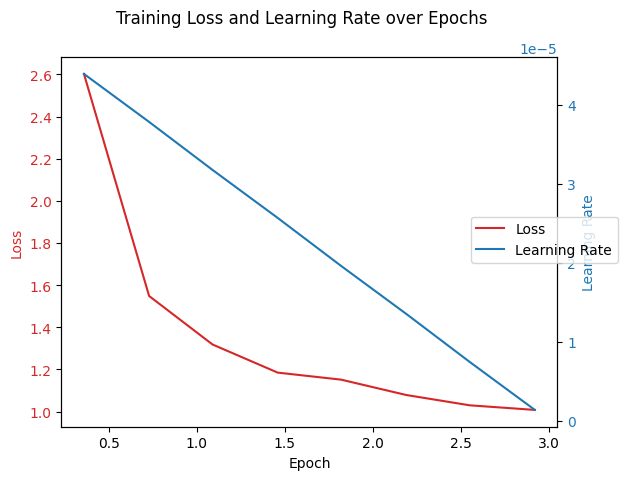

In [ ]:
import matplotlib.pyplot as plt

# Data from the logs
data = [
    {'loss': 0.614, 'learning_rate': 4.611680646163405e-05, 'epoch': 0.23},
    {'loss': 0.4741, 'learning_rate': 4.2233612923268096e-05, 'epoch': 0.47},
    {'loss': 0.4307, 'learning_rate': 3.835041938490215e-05, 'epoch': 0.7},
    {'loss': 0.4174, 'learning_rate': 3.4467225846536196e-05, 'epoch': 0.93},
    {'loss': 0.3864, 'learning_rate': 3.058403230817024e-05, 'epoch': 1.16},
    {'loss': 0.3757, 'learning_rate': 2.670083876980429e-05, 'epoch': 1.4},
    {'loss': 0.3661, 'learning_rate': 2.2817645231438335e-05, 'epoch': 1.63},
    {'loss': 0.3589, 'learning_rate': 1.8934451693072382e-05, 'epoch': 1.86},
    {'loss': 0.3506, 'learning_rate': 1.5051258154706432e-05, 'epoch': 2.1},
    {'loss': 0.3353, 'learning_rate': 1.1168064616340479e-05, 'epoch': 2.33},
    {'loss': 0.3331, 'learning_rate': 7.284871077974527e-06, 'epoch': 2.56},
    {'loss': 0.3305, 'learning_rate': 3.401677539608574e-06, 'epoch': 2.8},
]

data = [{'loss': 0.7661, 'learning_rate': 4.951460080770426e-05, 'epoch': 0.03},
{'loss': 0.5931, 'learning_rate': 4.902920161540851e-05, 'epoch': 0.06},
{'loss': 0.5533, 'learning_rate': 4.854380242311277e-05, 'epoch': 0.09},
{'loss': 0.5306, 'learning_rate': 4.805840323081703e-05, 'epoch': 0.12},
{'loss': 0.507, 'learning_rate': 4.757300403852128e-05, 'epoch': 0.15},
{'loss': 0.4967, 'learning_rate': 4.708760484622554e-05, 'epoch': 0.17},
{'loss': 0.4832, 'learning_rate': 4.660220565392979e-05, 'epoch': 0.2},
{'loss': 0.4757, 'learning_rate': 4.611680646163405e-05, 'epoch': 0.23},
{'loss': 0.4766, 'learning_rate': 4.563140726933831e-05, 'epoch': 0.26},
{'loss': 0.4534, 'learning_rate': 4.514600807704256e-05, 'epoch': 0.29},
{'loss': 0.4497, 'learning_rate': 4.466060888474682e-05, 'epoch': 0.32},
{'loss': 0.451, 'learning_rate': 4.4175209692451076e-05, 'epoch': 0.35},
{'loss': 0.4496, 'learning_rate': 4.3689810500155334e-05, 'epoch': 0.38},
{'loss': 0.4445, 'learning_rate': 4.3204411307859586e-05, 'epoch': 0.41},
{'loss': 0.4442, 'learning_rate': 4.271901211556384e-05, 'epoch': 0.44},
{'loss': 0.4286, 'learning_rate': 4.2233612923268096e-05, 'epoch': 0.47},
{'loss': 0.43, 'learning_rate': 4.1748213730972354e-05, 'epoch': 0.5},
{'loss': 0.422, 'learning_rate': 4.1262814538676606e-05, 'epoch': 0.52},
{'loss': 0.4201, 'learning_rate': 4.0777415346380864e-05, 'epoch': 0.55},
{'loss': 0.416, 'learning_rate': 4.029201615408512e-05, 'epoch': 0.58},
{'loss': 0.4034, 'learning_rate': 3.980661696178938e-05, 'epoch': 0.61},
{'loss': 0.411, 'learning_rate': 3.932121776949363e-05, 'epoch': 0.64},
{'loss': 0.4034, 'learning_rate': 3.883581857719789e-05, 'epoch': 0.67},
{'loss': 0.4039, 'learning_rate': 3.835041938490215e-05, 'epoch': 0.7},
{'loss': 0.4041, 'learning_rate': 3.78650201926064e-05, 'epoch': 0.73},
{'loss': 0.41, 'learning_rate': 3.737962100031065e-05, 'epoch': 0.76},
{'loss': 0.4159, 'learning_rate': 3.689422180801491e-05, 'epoch': 0.79},
{'loss': 0.4118, 'learning_rate': 3.640882261571917e-05, 'epoch': 0.82},
{'loss': 0.3925, 'learning_rate': 3.592342342342343e-05, 'epoch': 0.84},
{'loss': 0.401, 'learning_rate': 3.543802423112768e-05, 'epoch': 0.87},
{'loss': 0.3939, 'learning_rate': 3.495262503883194e-05, 'epoch': 0.9},
{'loss': 0.3768, 'learning_rate': 3.4467225846536196e-05, 'epoch': 0.93},
{'loss': 0.3842, 'learning_rate': 3.3981826654240454e-05, 'epoch': 0.96},
{'loss': 0.3919, 'learning_rate': 3.3496427461944706e-05, 'epoch': 0.99},
{'loss': 0.3644, 'learning_rate': 3.301102826964896e-05, 'epoch': 1.02},
{'loss': 0.3469, 'learning_rate': 3.2525629077353216e-05, 'epoch': 1.05},
{'loss': 0.354, 'learning_rate': 3.2040229885057474e-05, 'epoch': 1.08},
{'loss': 0.3413, 'learning_rate': 3.1554830692761726e-05, 'epoch': 1.11},
{'loss': 0.3523, 'learning_rate': 3.1069431500465984e-05, 'epoch': 1.14},
{'loss': 0.3555, 'learning_rate': 3.058403230817024e-05, 'epoch': 1.16},
{'loss': 0.3488, 'learning_rate': 3.0098633115874497e-05, 'epoch': 1.19},
{'loss': 0.3598, 'learning_rate': 2.9613233923578752e-05, 'epoch': 1.22},
{'loss': 0.3409, 'learning_rate': 2.912783473128301e-05, 'epoch': 1.25},
{'loss': 0.3496, 'learning_rate': 2.8642435538987266e-05, 'epoch': 1.28},
{'loss': 0.3465, 'learning_rate': 2.8157036346691517e-05, 'epoch': 1.31},
{'loss': 0.3561, 'learning_rate': 2.7671637154395776e-05, 'epoch': 1.34},
{'loss': 0.3416, 'learning_rate': 2.718623796210003e-05, 'epoch': 1.37},
{'loss': 0.347, 'learning_rate': 2.670083876980429e-05, 'epoch': 1.4},
{'loss': 0.3438, 'learning_rate': 2.6215439577508544e-05, 'epoch': 1.43},
{'loss': 0.342, 'learning_rate': 2.57300403852128e-05, 'epoch': 1.46},
{'loss': 0.3534, 'learning_rate': 2.5244641192917057e-05, 'epoch': 1.49},
{'loss': 0.3467, 'learning_rate': 2.4759242000621312e-05, 'epoch': 1.51},
{'loss': 0.349, 'learning_rate': 2.4273842808325567e-05, 'epoch': 1.54},
{'loss': 0.3273, 'learning_rate': 2.3788443616029822e-05, 'epoch': 1.57},
{'loss': 0.3339, 'learning_rate': 2.330304442373408e-05, 'epoch': 1.6},
{'loss': 0.332, 'learning_rate': 2.2817645231438335e-05, 'epoch': 1.63},
{'loss': 0.3346, 'learning_rate': 2.2332246039142594e-05, 'epoch': 1.66},
{'loss': 0.3325, 'learning_rate': 2.1846846846846845e-05, 'epoch': 1.69},
{'loss': 0.339, 'learning_rate': 2.1361447654551104e-05, 'epoch': 1.72},
{'loss': 0.335, 'learning_rate': 2.087604846225536e-05, 'epoch': 1.75},
{'loss': 0.3306, 'learning_rate': 2.0390649269959617e-05, 'epoch': 1.78},
{'loss': 0.3346, 'learning_rate': 1.9905250077663872e-05, 'epoch': 1.81},
{'loss': 0.3366, 'learning_rate': 1.9419850885368127e-05, 'epoch': 1.83},
{'loss': 0.3266, 'learning_rate': 1.8934451693072382e-05, 'epoch': 1.86},
{'loss': 0.3331, 'learning_rate': 1.844905250077664e-05, 'epoch': 1.89},
{'loss': 0.3323, 'learning_rate': 1.7963653308480895e-05, 'epoch': 1.92},
{'loss': 0.3245, 'learning_rate': 1.7478254116185154e-05, 'epoch': 1.95},
{'loss': 0.3366, 'learning_rate': 1.6992854923889405e-05, 'epoch': 1.98},
{'loss': 0.3161, 'learning_rate': 1.6507455731593664e-05, 'epoch': 2.01},
{'loss': 0.2931, 'learning_rate': 1.602205653929792e-05, 'epoch': 2.04},
{'loss': 0.3025, 'learning_rate': 1.5536657347002177e-05, 'epoch': 2.07},
{'loss': 0.2906, 'learning_rate': 1.5051258154706432e-05, 'epoch': 2.1},
{'loss': 0.2982, 'learning_rate': 1.4565858962410685e-05, 'epoch': 2.13},
{'loss': 0.2964, 'learning_rate': 1.4080459770114942e-05, 'epoch': 2.16},
{'loss': 0.2862, 'learning_rate': 1.3595060577819199e-05, 'epoch': 2.18},
{'loss': 0.2932, 'learning_rate': 1.3109661385523455e-05, 'epoch': 2.21},
{'loss': 0.2885, 'learning_rate': 1.2624262193227712e-05, 'epoch': 2.24},
{'loss': 0.295, 'learning_rate': 1.2138863000931967e-05, 'epoch': 2.27},
{'loss': 0.2976, 'learning_rate': 1.1653463808636222e-05, 'epoch': 2.3},
{'loss': 0.2977, 'learning_rate': 1.1168064616340479e-05, 'epoch': 2.33},
{'loss': 0.2894, 'learning_rate': 1.0682665424044735e-05, 'epoch': 2.36},
{'loss': 0.2867, 'learning_rate': 1.019726623174899e-05, 'epoch': 2.39},
{'loss': 0.2994, 'learning_rate': 9.711867039453247e-06, 'epoch': 2.42},
{'loss': 0.2943, 'learning_rate': 9.226467847157502e-06, 'epoch': 2.45},
{'loss': 0.2929, 'learning_rate': 8.741068654861759e-06, 'epoch': 2.48},
{'loss': 0.2886, 'learning_rate': 8.255669462566015e-06, 'epoch': 2.5},
{'loss': 0.2814, 'learning_rate': 7.77027027027027e-06, 'epoch': 2.53},
{'loss': 0.2864, 'learning_rate': 7.284871077974527e-06, 'epoch': 2.56},
{'loss': 0.2892, 'learning_rate': 6.799471885678782e-06, 'epoch': 2.59},
{'loss': 0.2768, 'learning_rate': 6.314072693383039e-06, 'epoch': 2.62},
{'loss': 0.278, 'learning_rate': 5.8286735010872945e-06, 'epoch': 2.65},
{'loss': 0.2862, 'learning_rate': 5.34327430879155e-06, 'epoch': 2.68},
{'loss': 0.2876, 'learning_rate': 4.857875116495807e-06, 'epoch': 2.71},
{'loss': 0.2967, 'learning_rate': 4.372475924200063e-06, 'epoch': 2.74},
{'loss': 0.2825, 'learning_rate': 3.887076731904319e-06, 'epoch': 2.77},
{'loss': 0.2937, 'learning_rate': 3.401677539608574e-06, 'epoch': 2.8},
{'loss': 0.2819, 'learning_rate': 2.9162783473128303e-06, 'epoch': 2.83},
{'loss': 0.2819, 'learning_rate': 2.430879155017086e-06, 'epoch': 2.85},
{'loss': 0.2817, 'learning_rate': 1.9454799627213424e-06, 'epoch': 2.88},
{'loss': 0.2892, 'learning_rate': 1.4600807704255982e-06, 'epoch': 2.91},
{'loss': 0.2859, 'learning_rate': 9.74681578129854e-07, 'epoch': 2.94},
{'loss': 0.2875, 'learning_rate': 4.892823858341099e-07, 'epoch': 2.97},
{'loss': 0.2911, 'learning_rate': 3.8831935383659524e-09, 'epoch': 3.0}
]

data=[{'loss': 2.6026, 'learning_rate': 4.392171164600049e-05, 'epoch': 0.36},
{'loss': 1.5484, 'learning_rate': 3.7843423292000975e-05, 'epoch': 0.73},
{'loss': 1.3182, 'learning_rate': 3.1765134938001465e-05, 'epoch': 1.09},
{'loss': 1.1847, 'learning_rate': 2.5686846584001945e-05, 'epoch': 1.46},
{'loss': 1.1513, 'learning_rate': 1.9608558230002434e-05, 'epoch': 1.82},
{'loss': 1.0784, 'learning_rate': 1.353026987600292e-05, 'epoch': 2.19},
{'loss': 1.0295, 'learning_rate': 7.451981522003404e-06, 'epoch': 2.55},
{'loss': 1.0076, 'learning_rate': 1.37369316800389e-06, 'epoch': 2.92}
]

# Extracting the individual lists of metrics
epochs = [point['epoch'] for point in data]
losses = [point['loss'] for point in data]
learning_rates = [point['learning_rate'] for point in data]

# Creating subplots
fig, ax1 = plt.subplots()

# Plotting loss on the left y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, losses, color='tab:red', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Instantiating a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color='tab:blue')
ax2.plot(epochs, learning_rates, color='tab:blue', label='Learning Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and legend
fig.suptitle('Training Loss and Learning Rate over Epochs')
fig.legend(loc='center right')

# Show plot
plt.show()


# Backup File

In [ ]:
#解壓縮檔案
!unzip trained_model_64_s.zip -d trained_model_64_s

In [ ]:
!zip -r trained_model_32_s.zip trained_model_32/runs/
!zip -r trained_model_32_s.zip trained_model_32/checkpoint-49500/
!zip -r trained_model_32_s.zip trained_model_32/checkpoint-50000/
!zip -r trained_model_32_s.zip trained_model_32/checkpoint-50500/
!zip -r trained_model_32_s.zip trained_model_32/checkpoint-51000/
!zip -r trained_model_32_s.zip trained_model_32/checkpoint-51500/

In [ ]:
!zip -r trained_model_s.zip trained_model/trained_model/runs/
!zip -r trained_model_s.zip trained_model/trained_model/checkpoint-5000/
!zip -r trained_model_s.zip trained_model/trained_model/checkpoint-5500/
!zip -r trained_model_s.zip trained_model/trained_model/checkpoint-6000/

In [ ]:
cd ..

/content/final


In [18]:
!zip -r eval_qa_ad_merge_model_1203.zip eval_qa_ad_merge_model_1203

  adding: eval_qa_ad_merge_model_1203/ (stored 0%)
  adding: eval_qa_ad_merge_model_1203/eval_metrics.json (deflated 4%)
  adding: eval_qa_ad_merge_model_1203/eval_predictions.jsonl (stored 0%)
  adding: eval_qa_ad_merge_model_1203/runs/ (stored 0%)
  adding: eval_qa_ad_merge_model_1203/runs/Dec05_16-27-45_e6fb2595f324/ (stored 0%)
  adding: eval_qa_ad_merge_model_1203/runs/Dec05_16-27-45_e6fb2595f324/events.out.tfevents.1701793744.e6fb2595f324.12525.0 (deflated 15%)


In [ ]:
!zip -r trained_model_64_s.zip trained_model_64/runs/
!zip -r trained_model_64_s.zip trained_model_64/checkpoint-23500/
!zip -r trained_model_64_s.zip trained_model_64/checkpoint-24000/
!zip -r trained_model_64_s.zip trained_model_64/checkpoint-24500/
!zip -r trained_model_64_s.zip trained_model_64/checkpoint-25000/
!zip -r trained_model_64_s.zip trained_model_64/checkpoint-25500/

In [ ]:
ls -all

total 5457536
drwx------ 9 root root       4096 Nov 30 16:25  ./
drwxr-xr-x 1 root root       4096 Nov 30 12:52  ../
drwxr-xr-x 9 root root       4096 Nov 30 15:44  biased_qa_merge_model_1130/
-rw-r--r-- 1 root root 4261342723 Nov 30 15:49  biased_qa_merge_model_1130.zip
-rw------- 1 root root  245120898 Nov 30 12:53  biased_squad_1129-20231130T104757Z-001.zip
drwxr-xr-x 2 root root       4096 Nov 30 15:27  biased_squad_1130/
-rw------- 1 root root  245121024 Nov 30 12:53  biased_squad_1130-20231130T104802Z-001.zip
-rw-r--r-- 1 root root  244912444 Nov 30 16:25  biased_squad_1130.zip
-rw------- 1 root root    9229894 Nov 30 12:53  checklist_train_1130.csv
-rw------- 1 root root    9208688 Nov 30 12:52  checklist_train.csv
-rw------- 1 root root  217031830 Nov 30 12:53  combined_train_1130.csv
-rw------- 1 root root   86919353 Nov 30 12:52  combined_train.csv
drwx------ 3 root root       4096 Nov 30 12:52  eval_output_qa_64/
drwxr-xr-x 3 root root       4096 Nov 30 16:00  eval_qa_merge_

In [ ]:

!cp -r /content/final/biased_squad_1203.zip /content/MyDrive/MyDrive/UT_NLP/final/

In [19]:

!cp -r /content/final/eval_qa_merge_model_1130 /content/MyDrive/MyDrive/UT_NLP/final/

!cp -r /content/final/eval_qa_ad_merge_model_1130 /content/MyDrive/MyDrive/UT_NLP/final/

cp: cannot stat '/content/final/eval_qa_ad_merge_model_1130': No such file or directory


In [ ]:
#將檔案copy回去
#!cp -r /content/final/squad_suite.pkl /content/MyDrive/MyDrive/UT_NLP/final/squad_suite.pkl

!cp -r /content/final/biased_squad_1203 /content/MyDrive/MyDrive/UT_NLP/final/
#!cp -r /content/final/biased_qa_merge_model_1130 /content/MyDrive/MyDrive/UT_NLP/final/

#!cp -r /content/final/eval_qa_merge_model_1130 /content/MyDrive/MyDrive/UT_NLP/final/



In [ ]:
#將檔案copy回去
#!cp -r /content/final/trained_model.zip /content/MyDrive/MyDrive/UT_NLP/final/trained_model.zip
!cp -r /content/final/run.py /content/MyDrive/MyDrive/UT_NLP/final/run.py
!cp -r /content/final/run_combined_new.py /content/MyDrive/MyDrive/UT_NLP/final/run_combined_new.py

#!cp -r /content/a4-distrib/factchecking_main.py /content/MyDrive/MyDrive/UT_NLP/a4-distrib/factchecking_main.py
#!cp -r /content/a4-distrib/transformer.py /content/MyDrive/MyDrive/UT_NLP/a4-distrib/transformer.py

In [ ]:
!cp -r /content/final /content/MyDrive/MyDrive/UT_NLP


# 新增區段

In [ ]:
#copy zip file
!cp -r /content/final/eval_merge_qa_model_1130.zip /content/MyDrive/MyDrive/UT_NLP